##  Crop Yield Prediction Using Machine Learning

**About Dataset**

- The science of training machines to learn and produce models for future predictions is widely used, and not for nothing. Agriculture plays a critical role in the global economy. With the continuing expansion of the human population understanding worldwide crop yield is central to addressing food security challenges and reducing the impacts of climate change.

- Crop yield prediction is an important agricultural problem. The Agricultural yield primarily depends on weather conditions (rain, temperature, etc), pesticides and accurate information about history of crop yield is an important thing for making decisions related to agricultural risk management and future predictions.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("ggplot")

In [6]:
cy = pd.read_csv("dataset/yield_df.csv")
cy

,Unnamed: 0,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0,Albania,Maize,1990,36613,1485.0,121.00,16.37
1,1,Albania,Potatoes,1990,66667,1485.0,121.00,16.37
2,2,Albania,"Rice, paddy",1990,23333,1485.0,121.00,16.37
3,3,Albania,Sorghum,1990,12500,1485.0,121.00,16.37
4,4,Albania,Soybeans,1990,7000,1485.0,121.00,16.37
...,...,...,...,...,...,...,...,...
28237,28237,Zimbabwe,"Rice, paddy",2013,22581,657.0,2550.07,19.76
28238,28238,Zimbabwe,Sorghum,2013,3066,657.0,2550.07,19.76
28239,28239,Zimbabwe,Soybeans,2013,13142,657.0,2550.07,19.76
28240,28240,Zimbabwe,Sweet potatoes,2013,22222,657.0,2550.07,19.76


In [7]:
cy.drop('Unnamed: 0', axis=1, inplace=True)

In [8]:
cy.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [9]:
cy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Area                           28242 non-null  object 
 1   Item                           28242 non-null  object 
 2   Year                           28242 non-null  int64  
 3   hg/ha_yield                    28242 non-null  int64  
 4   average_rain_fall_mm_per_year  28242 non-null  float64
 5   pesticides_tonnes              28242 non-null  float64
 6   avg_temp                       28242 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.5+ MB


In [10]:
cy.isnull().sum()

Area                             0
Item                             0
Year                             0
hg/ha_yield                      0
average_rain_fall_mm_per_year    0
pesticides_tonnes                0
avg_temp                         0
dtype: int64

In [11]:
cy.duplicated().sum()

2310

In [12]:
cy.drop_duplicates(inplace=True)

In [14]:
cy.duplicated().sum()

0

In [15]:
cy.shape

(25932, 7)

In [16]:
cy.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,25932.000000,25932.000000,25932.000000,25932.000000,25932.000000
mean,2001.556455,76978.132925,1146.836688,34782.573241,20.422251
std,7.055924,84647.605552,717.391098,57228.568244,6.439402
min,1990.000000,50.000000,51.000000,0.040000,1.300000
25%,1995.000000,19996.000000,593.000000,1597.000000,16.580000
50%,2001.000000,39530.000000,1083.000000,15373.000000,21.420000
75%,2008.000000,104168.000000,1668.000000,45620.000000,26.060000
max,2013.000000,501412.000000,3240.000000,367778.000000,30.650000


### Data Visualization


In [17]:
cy.corr()

C:\Users\Hamza\AppData\Local\Temp\ipykernel_11600\416372992.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cy.corr()


,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
Year,1.000000,0.091327,-0.006423,0.135127,0.013701
hg/ha_yield,0.091327,1.000000,-0.004067,0.065523,-0.110400
average_rain_fall_mm_per_year,-0.006423,-0.004067,1.000000,0.161483,0.333694
pesticides_tonnes,0.135127,0.065523,0.161483,1.000000,0.045577
avg_temp,0.013701,-0.110400,0.333694,0.045577,1.000000


In [18]:
len(cy['Area'].unique())

101

In [19]:
len(cy['Item'].unique())

10

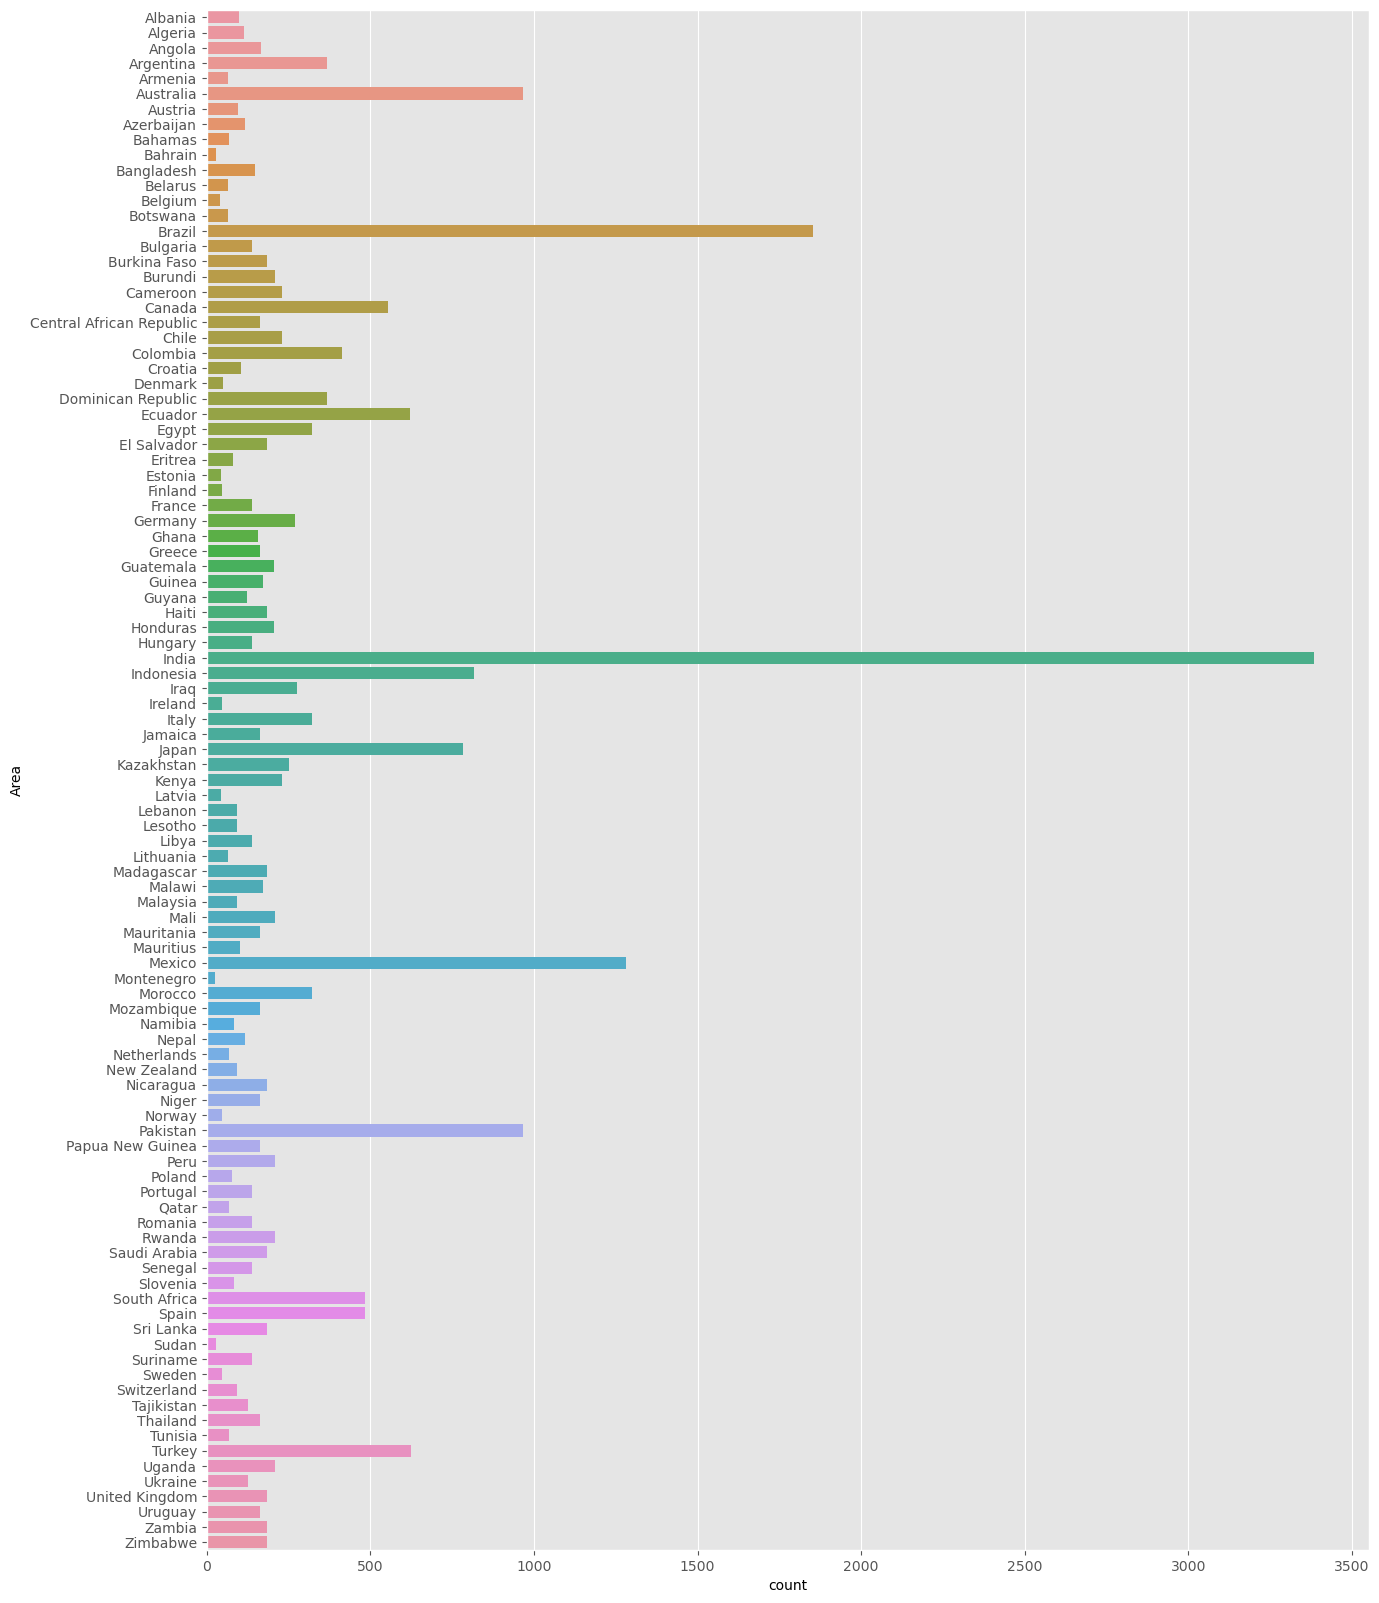

In [20]:
plt.figure(figsize=(15,20))
sns.countplot(y = cy['Area'])
plt.show()

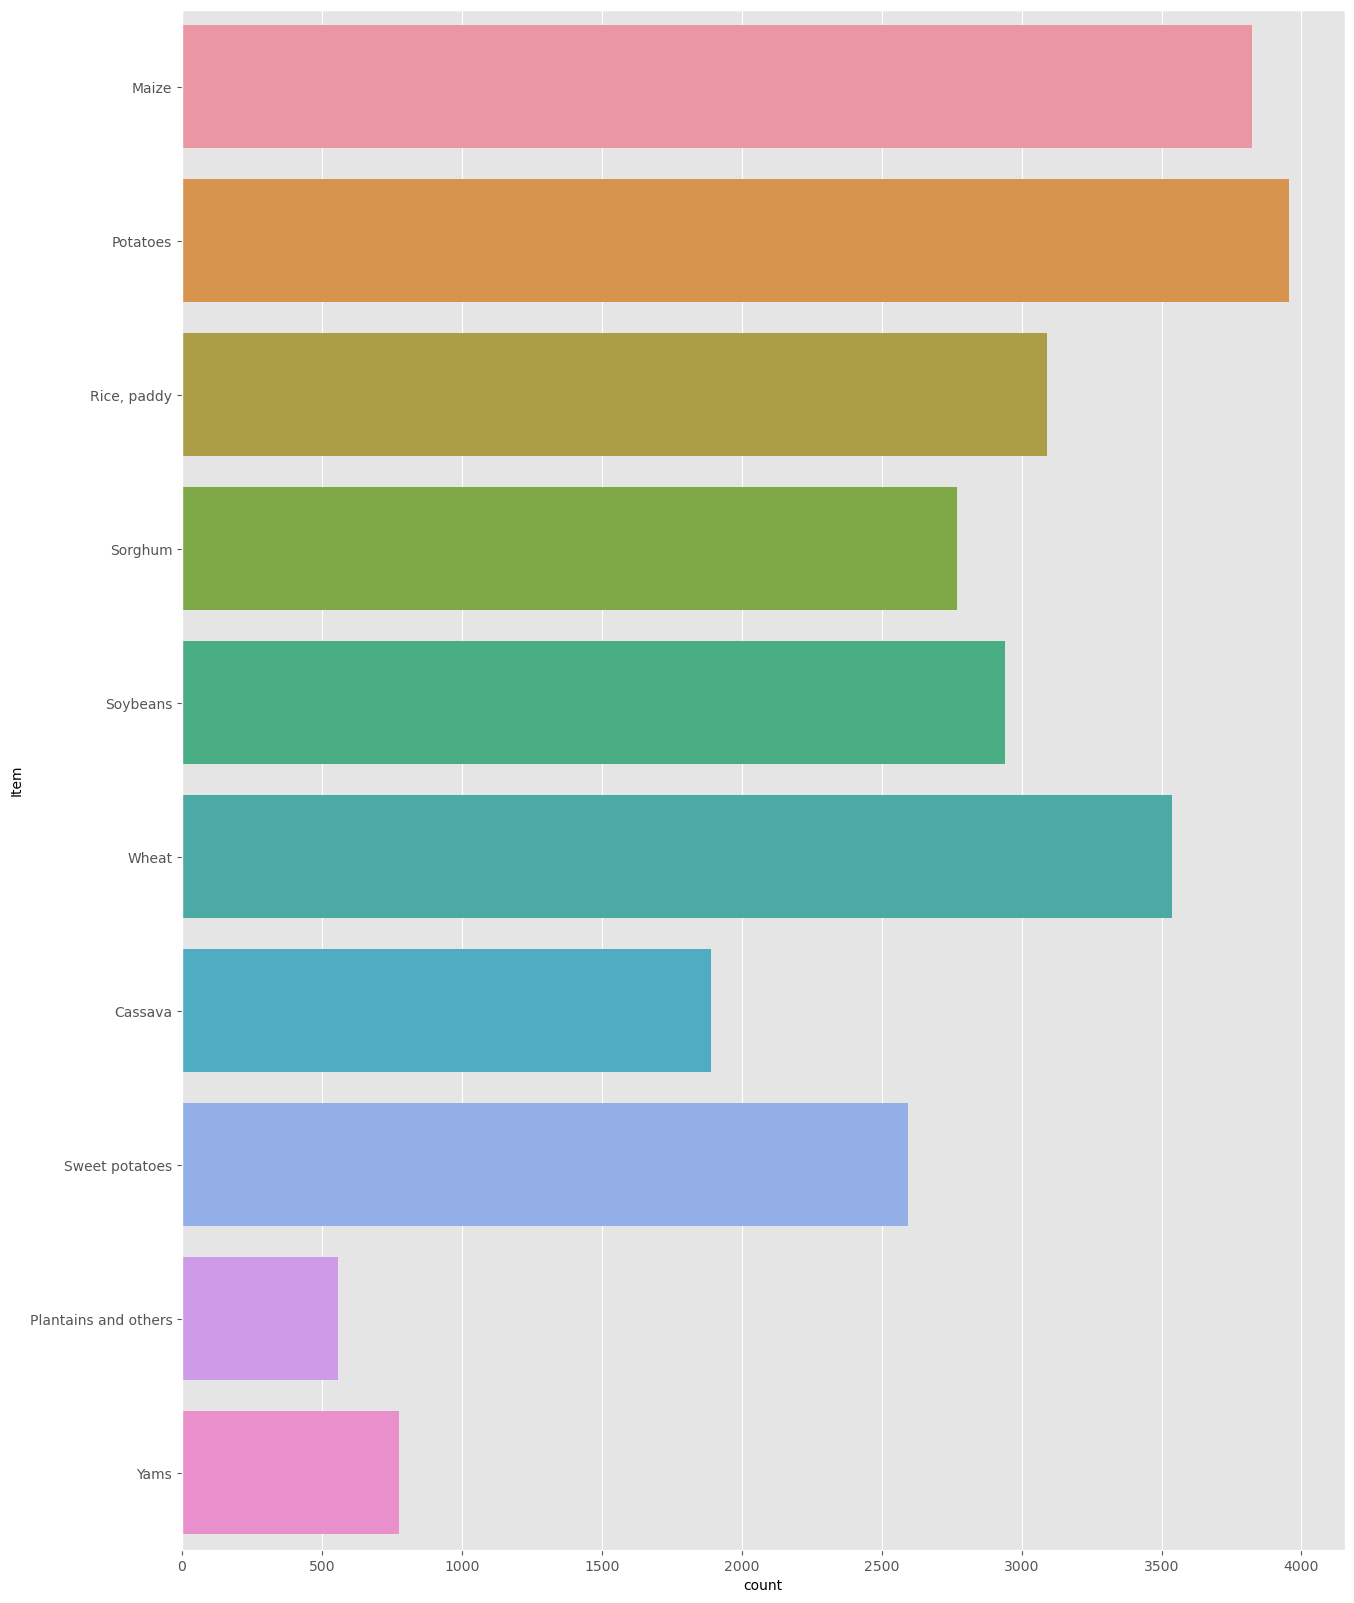

In [21]:
plt.figure(figsize=(15,20))
sns.countplot(y = cy['Item'])
plt.show()

In [44]:
(cy['Area'].value_counts() < 400).sum()

88

In [45]:
country = cy['Area'].unique()
yield_per_country = []
for state in country:
    yield_per_country.append(cy[cy['Area'] == state]['hg/ha_yield'].sum())

In [46]:
cy['hg/ha_yield'].sum()

1996196943

In [62]:
#yield_per_countr

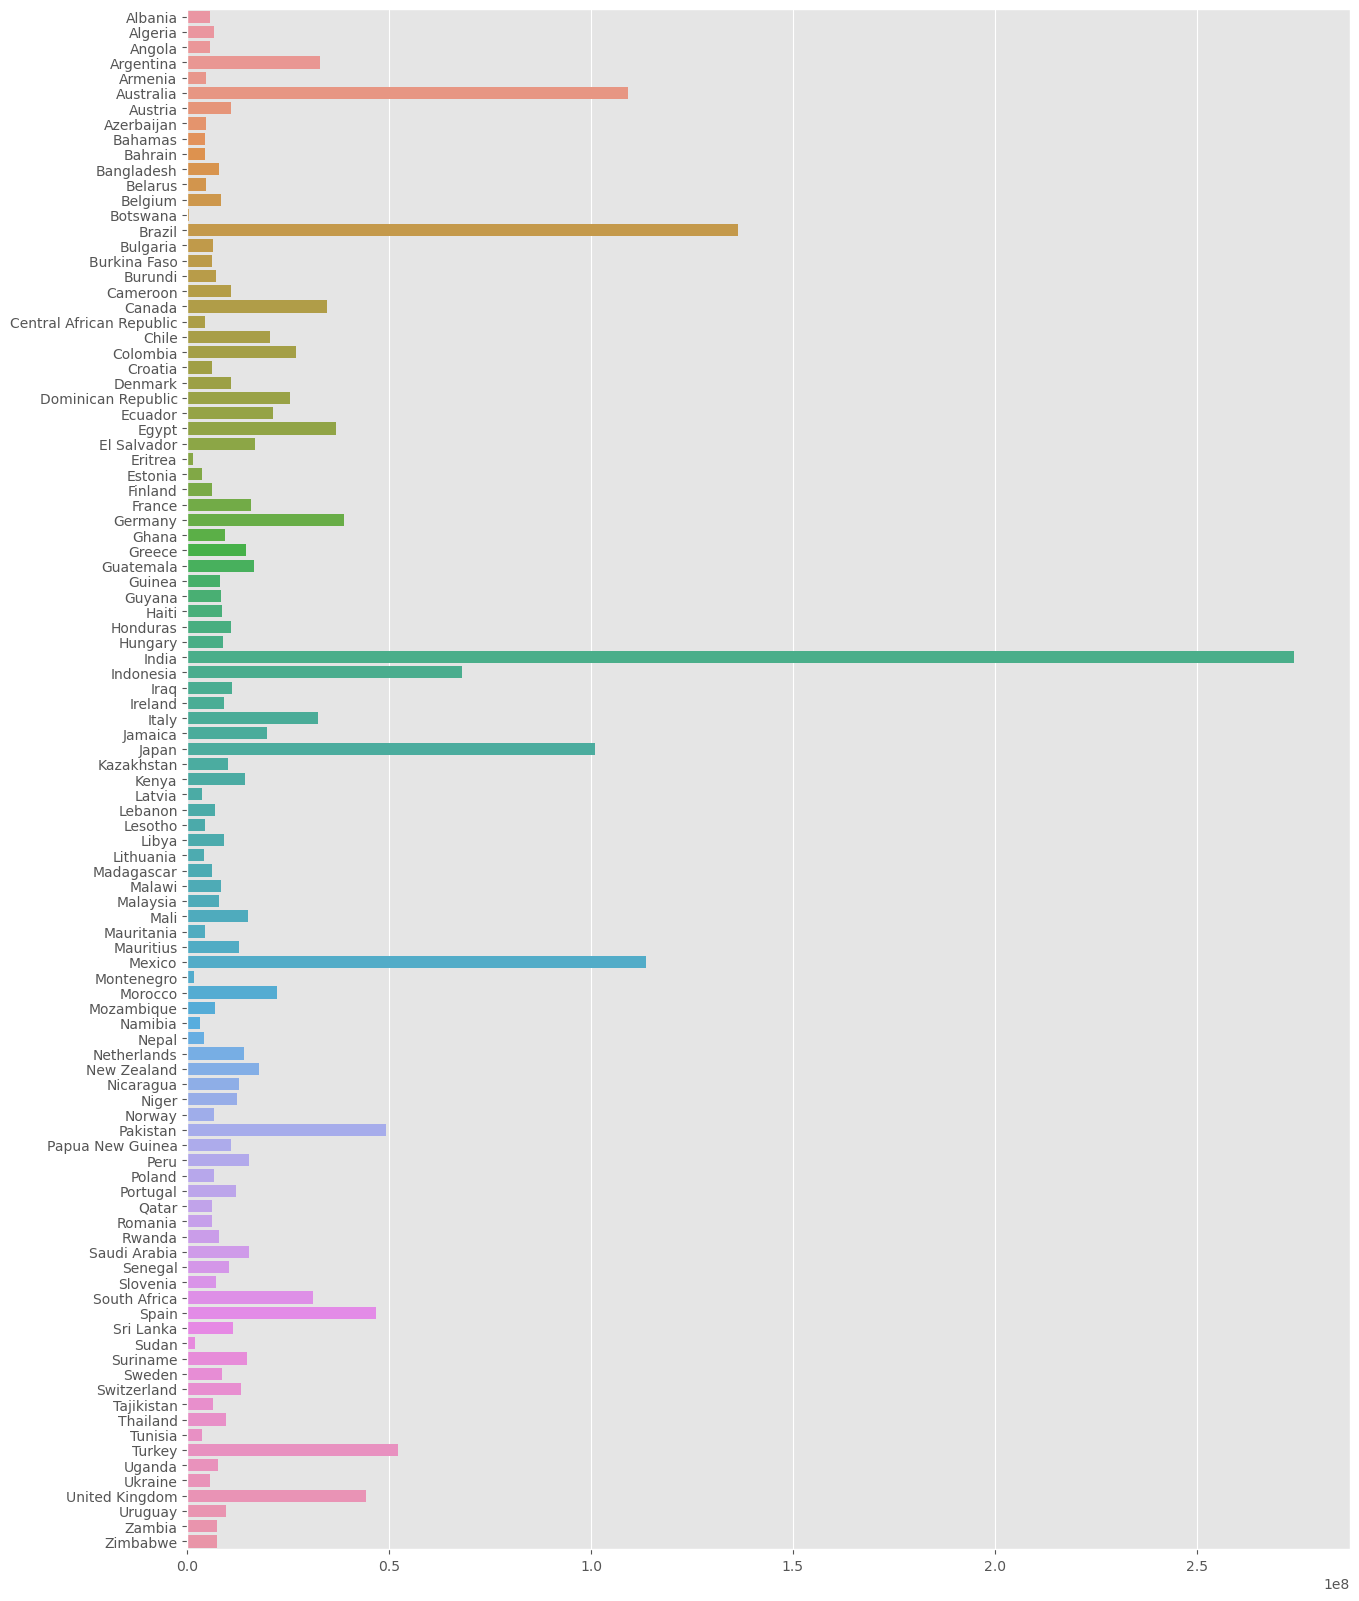

In [48]:
plt.figure(figsize = (15, 20))
sns.barplot(y = country, x = yield_per_country)
plt.show()

In [49]:
crops = cy['Item'].unique()
yield_per_crop = []
for crop in crops:
    yield_per_crop.append(cy[cy['Item'] == crop]['hg/ha_yield'].sum())

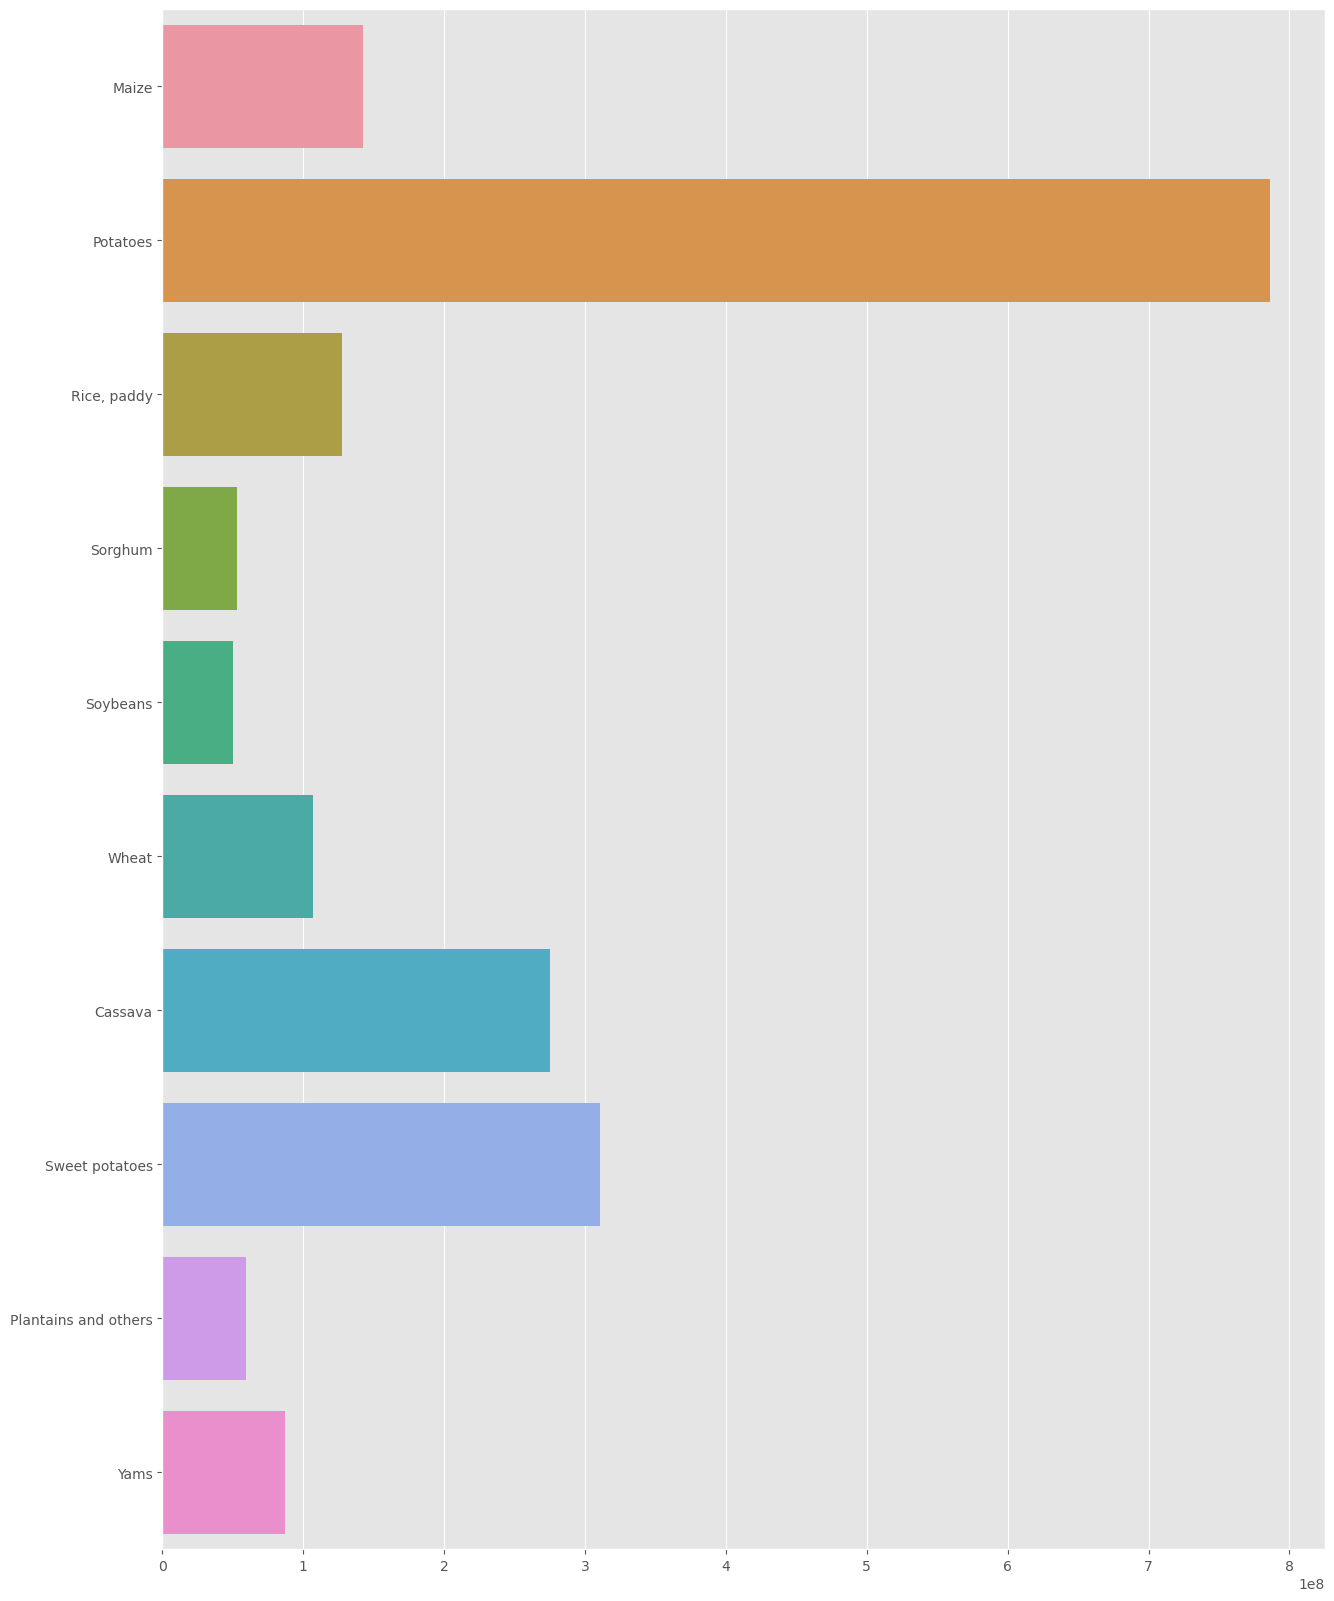

In [50]:
plt.figure(figsize = (15, 20))
sns.barplot(y = crops, x = yield_per_crop)
plt.show()

In [52]:
cy.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


In [53]:
cy.columns

Index(['Area', 'Item', 'Year', 'hg/ha_yield', 'average_rain_fall_mm_per_year',
       'pesticides_tonnes', 'avg_temp'],
      dtype='object')

In [54]:
col = ['Year','average_rain_fall_mm_per_year','pesticides_tonnes', 'avg_temp','Area', 'Item', 'hg/ha_yield']

In [55]:
cy = cy[col]
cy.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [56]:
X = cy.drop('hg/ha_yield', axis = 1)
y = cy['hg/ha_yield']

In [60]:
print(f"The shape of X data : {X.shape}")
print(f"The shape of y data : {y.shape}")

The shape of X data : (25932, 6)
The shape of y data : (25932,)


In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0, shuffle=True)

In [64]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

ohe = OneHotEncoder(drop = 'first')
scale = StandardScaler()

preprocesser = ColumnTransformer(
    transformers = [
        ('StandardScale', scale, [0,1,2,3]),
        ('OneHotEncode', ohe, [4,5])
    ], 
    remainder = 'passthrough'
) 

In [65]:
X_train_dummy = preprocesser.fit_transform(X_train)
X_test_dummy  = preprocesser.fit_transform(X_test)

In [67]:
#preprocesser.get_feature_names_out(col[:-1])

In [68]:
from sklearn.linear_model import LinearRegression,Lasso, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score

In [73]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'Decision Tree': DecisionTreeRegressor(),
    'KNN': KNeighborsRegressor(),
}

# Function to evaluate and compare models
def evaluate_model(model, model_name, X_train, y_train, X_test, y_test):
    # Fit the model
    model.fit(X_train, y_train)
    
    # Train predictions and evaluation
    y_pred_train = model.predict(X_train)
    train_mae = mean_absolute_error(y_train, y_pred_train)
    train_r2 = r2_score(y_train, y_pred_train)
    print(f"Train MAE of {model_name}: {train_mae:.4f} and R² score: {train_r2:.4f}")
    
    # Test predictions and evaluation
    y_pred_test = model.predict(X_test)
    test_mae = mean_absolute_error(y_test, y_pred_test)
    test_r2 = r2_score(y_test, y_pred_test)
    print(f"Test MAE of {model_name}: {test_mae:.4f} and R² score: {test_r2:.4f}")
    
    # Separator for readability
    print("\n" + "-" * 50 + "\n")

# Loop through each model and evaluate
for name, model in models.items():
    evaluate_model(model, name, X_train_dummy, y_train, X_test_dummy, y_test)

Train MAE of Linear Regression: 29538.7900 and R² score: 0.7519
Test MAE of Linear Regression: 29897.2814 and R² score: 0.7473

--------------------------------------------------



C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 67280771830.03516, tolerance: 14848622817.505228
  model = cd_fast.sparse_enet_coordinate_descent(


Train MAE of Lasso: 29521.1507 and R² score: 0.7519
Test MAE of Lasso: 29883.8307 and R² score: 0.7473

--------------------------------------------------

Train MAE of Ridge: 29488.0821 and R² score: 0.7518
Test MAE of Ridge: 29852.9454 and R² score: 0.7473

--------------------------------------------------

Train MAE of Decision Tree: 0.0000 and R² score: 1.0000
Test MAE of Decision Tree: 5451.7471 and R² score: 0.9706

--------------------------------------------------

Train MAE of KNN: 3518.7391 and R² score: 0.9906
Test MAE of KNN: 4693.9858 and R² score: 0.9845

--------------------------------------------------



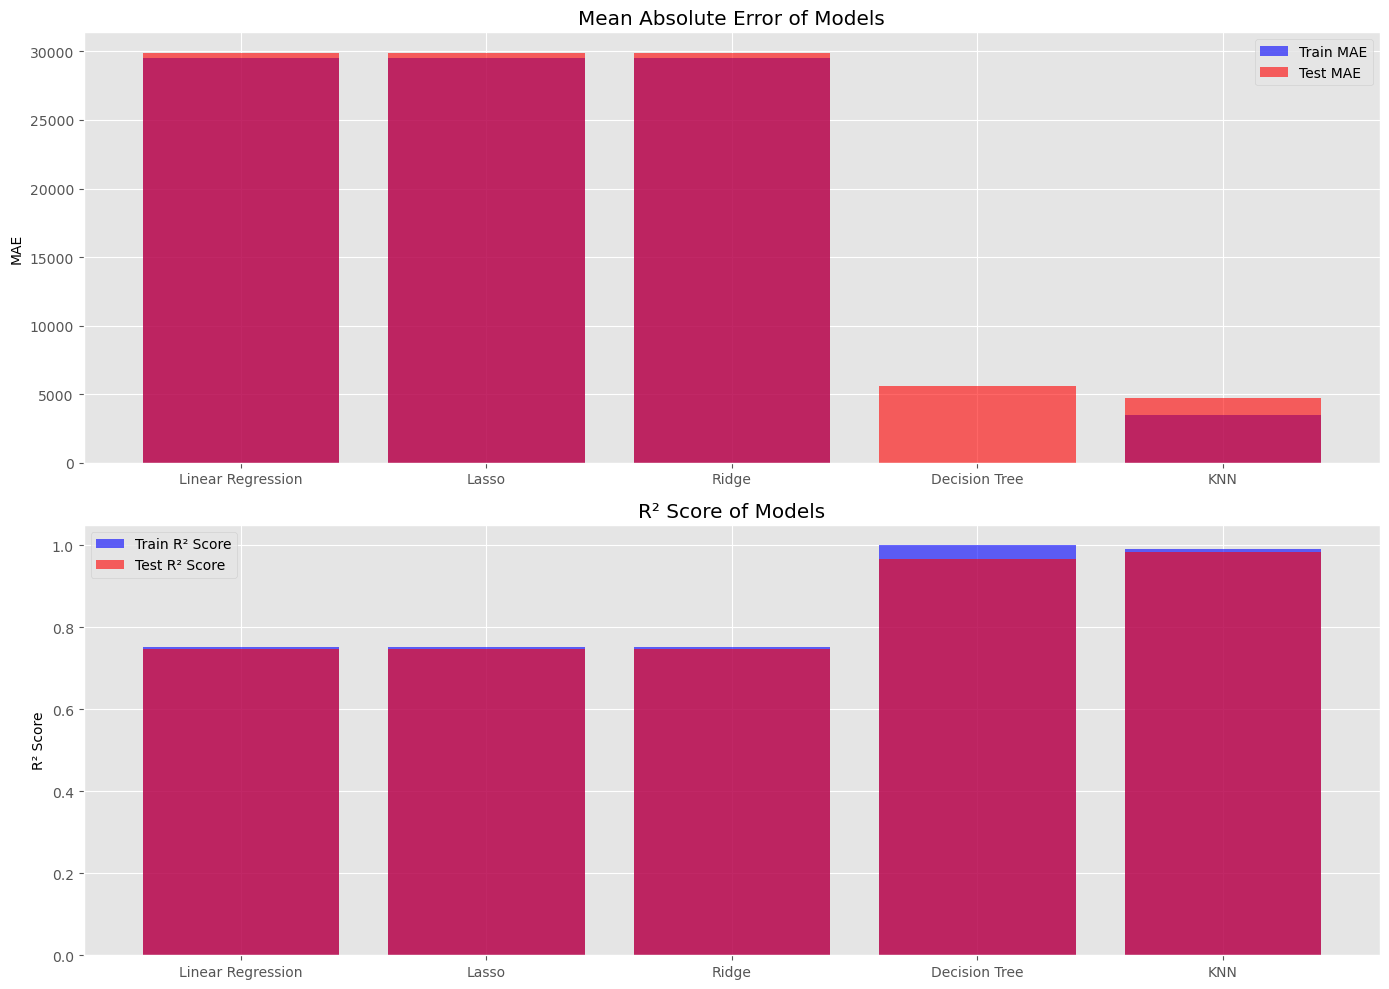

In [78]:
# Plotting the performance of models
def plot_model_performance(results_cy):
    # Set plot style and figure size
    plt.style.use('ggplot')
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))

    # Plot Train and Test MAE
    axes[0].bar(results_cy['Model'], results_cy['Train MAE'], color='blue', alpha=0.6, label='Train MAE')
    axes[0].bar(results_cy['Model'], results_cy['Test MAE'], color='red', alpha=0.6, label='Test MAE')
    axes[0].set_title('Mean Absolute Error of Models')
    axes[0].set_ylabel('MAE')
    axes[0].legend()

    # Plot Train and Test R² Score
    axes[1].bar(results_cy['Model'], results_cy['Train R² Score'], color='blue', alpha=0.6, label='Train R² Score')
    axes[1].bar(results_cy['Model'], results_cy['Test R² Score'], color='red', alpha=0.6, label='Test R² Score')
    axes[1].set_title('R² Score of Models')
    axes[1].set_ylabel('R² Score')
    axes[1].legend()

    # Adjust layout and show plot
    plt.tight_layout()
    plt.show()

# Call the plotting function with the results dataframe
plot_model_performance(results_df)


In [79]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train_dummy,y_train)
dtr.predict(X_test_dummy)

array([35286., 22814., 19295., ..., 16135., 34879., 77391.])

In [80]:
knn = KNeighborsRegressor()
knn.fit(X_train_dummy,y_train)
knn.predict(X_test_dummy)

array([ 36704.4,  26340.4,  21543.2, ...,  23360.4,  35078.6, 157096.8])

In [81]:
cy.columns

Index(['Year', 'average_rain_fall_mm_per_year', 'pesticides_tonnes',
       'avg_temp', 'Area', 'Item', 'hg/ha_yield'],
      dtype='object')

In [82]:
cy.head()

,Year,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Area,Item,hg/ha_yield
0,1990,1485.0,121.0,16.37,Albania,Maize,36613
1,1990,1485.0,121.0,16.37,Albania,Potatoes,66667
2,1990,1485.0,121.0,16.37,Albania,"Rice, paddy",23333
3,1990,1485.0,121.0,16.37,Albania,Sorghum,12500
4,1990,1485.0,121.0,16.37,Albania,Soybeans,7000


In [83]:
# Predictive System
def prediction(Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item):
    features = np.array([[Year, average_rain_fall_mm_per_year, pesticides_tonnes, avg_temp, Area, Item]], dtype = object)
    transform_features = preprocesser.transform(features)
    predicted_yeild = dtr.predict(transform_features).reshape(-1,1)
    return predicted_yeild[0][0]

In [86]:
dtr_result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')
knn_result = prediction(1990,1485.0,121.0,16.37,'Albania','Maize')

C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Hamza\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


In [87]:
print(dtr_result)
print(knn_result)

36613.0
36613.0


In [89]:
import pickle
pickle.dump(dtr, open("models/dtr_model.pkl","wb"))
pickle.dump(knn, open("models/knn_model.pkl","wb"))
pickle.dump(preprocesser, open("models/preprocesser.pkl","wb"))

In [93]:
# Assuming the column with names is called 'Name'
unique_names = df['Item'].unique()

# Print unique names
print(unique_names)

['Maize' 'Potatoes' 'Rice, paddy' 'Sorghum' 'Soybeans' 'Wheat' 'Cassava'
 'Sweet potatoes' 'Plantains and others' 'Yams']
